In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot


In [5]:
coca=pd.read_csv("C:\\Users\\DELL\\Downloads\\CocaCola_Sales_Rawdata_new.csv")
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


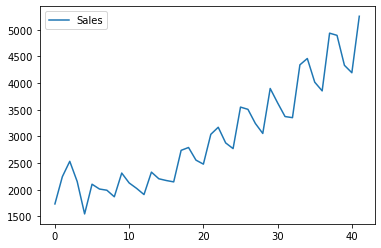

In [6]:
coca.plot()
pyplot.show()

## Histogram and Density Plots


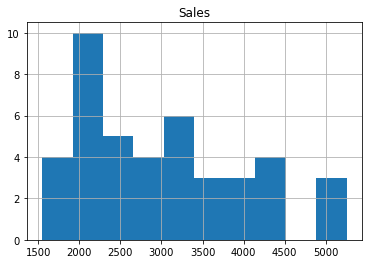

In [7]:
coca.hist()
pyplot.show()

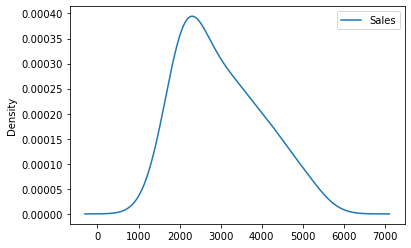

In [8]:
coca.plot(kind='kde')
pyplot.show()

## ACF plots and PACF plots

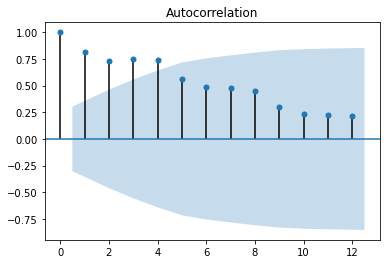

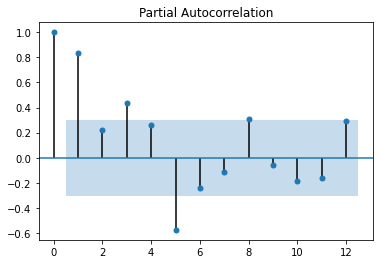

In [12]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coca.Sales,lags=12)
tsa_plots.plot_pacf(coca.Sales,lags=12)
pyplot.show()


## Time series decomposition plot


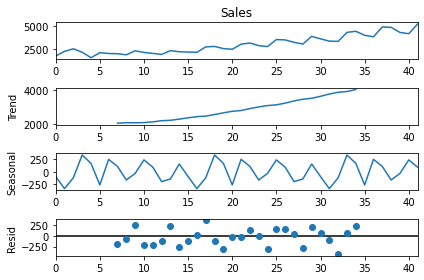

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(coca.Sales,period=15)
decompose_ts_add.plot()
pyplot.show()

In [14]:
quarters=['Q1','Q2','Q3','Q4']
coca["quarters"]=0
import numpy as np
p = coca["Quarter"][0]
p[0:2]

'Q1'

In [15]:
for i in range(42):
    p = coca["Quarter"][i]
    coca['quarters'][i]= p[0:2]
    

<ipython-input-15-aa7d2d1ae647>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca['quarters'][i]= p[0:2]
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
quarter_dummies = pd.DataFrame(pd.get_dummies(coca['quarters']))
coca1 = pd.concat([coca,quarter_dummies],axis = 1)
coca1["t"] = np.arange(1,43)


In [18]:
coca1["t_squared"] = coca1["t"]*coca1["t"]
coca1["log_Sales"] = np.log(coca1["Sales"])


In [19]:
Train = coca1.head(32)
Test = coca1.tail(10)
Test=Test.set_index(np.arange(1,11))


In [20]:
def Cal_RMSE(actual,pred):
    RMSE=np.sqrt(np.mean((np.array(actual)-np.array(pred))**2))
    return RMSE

# LINEAR

In [21]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
actual=np.array(Test['Sales'])
rmse_linear = Cal_RMSE(actual,pred_linear)
rmse_linear



752.9233933232192

# Exponential

In [22]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
pred=np.exp(pred_Exp)
rmse_Exp = Cal_RMSE(actual,pred)
rmse_Exp

590.3316432612997

# Quadratic

In [23]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = Cal_RMSE(actual,pred_Quad)
rmse_Quad

457.7357355593616

# Additive seasonality

In [24]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = Cal_RMSE(actual,pred_add_sea)
rmse_add_sea

1850.466546169034

# Additive Seasonality Quadratic

In [25]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = Cal_RMSE(actual,pred_add_sea_quad)
rmse_add_sea_quad

277.3510771147773

# Multiplicative Seasonality

In [14]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.2503948174185

# Multiplicative Additive Seasonality

In [28]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = Cal_RMSE(actual,pred)
rmse_Mult_add_sea

590.3316432612997

# Testing

In [29]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,752.923393
1,rmse_Exp,590.331643
2,rmse_Quad,457.735736
3,rmse_add_sea,1850.466546
4,rmse_add_sea_quad,277.351077
5,rmse_Mult_sea,590.331643
6,rmse_Mult_add_sea,590.331643


###  The Rmse value for Additive Seasonality Quadratic is least i.e. 277.35 thus  we use this model